# **TASK 01 : DATA PREPARATION AND CUSTOMER ANALYTICS**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import ttest_ind

**Transaction Dataset**

In [7]:
# Transactions
df_transaction = pd.read_csv('/content/QVI_transaction_data_1_.csv')
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


**Customer Dataset**

In [4]:
# Customers
df_customer = pd.read_csv('/content/QVI_purchase_behaviour.csv')
df_customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


**Merge Datasets**

In [8]:
# Merging the datasets
df = pd.merge(df_transaction, df_customer, on='LYLTY_CARD_NBR', how= 'left')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


**Exploratory Data Analysis**

In [9]:
# Rename the columns to become meaningfil
df = df.rename(columns={'LYLTY_CARD_NBR': 'Customer Number',
                        'LIFESTAGE': 'Group',
                        'PREMIUM_CUSTOMER': 'Subscription',
                        'DATE': 'Date',
                        'STORE_NBR': 'Store Id',
                        'TXN_ID': 'Transaction Id',
                        'PROD_NBR': 'Product Number',
                        'PROD_NAME': 'Product',
                        'PROD_QTY': 'Quantity',
                        'TOT_SALES': 'Sales',})
df.head()

,Date,Store Id,Customer Number,Transaction Id,Product Number,Product,Quantity,Sales,Group,Subscription
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


**Examine** **Datatypes**

In [10]:
df.dtypes

,0
Date,int64
Store Id,int64
Customer Number,int64
Transaction Id,int64
Product Number,int64
Product,object
Quantity,int64
Sales,float64
Group,object
Subscription,object


**Convert the Date Datatype From (int to float)**

In [11]:
# Show 15 dates
date_offsets = df['Date'].to_list()
base_date = pd.Timestamp('1899-12-30') #Starting Date
df['Date'] = [base_date + pd.DateOffset(date_offsets) for date_offsets in date_offsets]
df['Date'][0:15]

,Date
0,2018-10-17
1,2019-05-14
2,2019-05-20
3,2018-08-17
4,2018-08-18
5,2019-05-19
6,2019-05-16
7,2019-05-16
8,2018-08-20
9,2018-08-18


**Products Summary**

In [12]:
df['Product'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

**Text Analysis on Products**

In [13]:
# Remove numbers and special characters
split_prods = df['Product'].str.replace(r"([0-9]+[gG])", "").str.replace(r"[^/w]", " ").str.split()
split_prods

,Product
0,"[Natural, Chip, Compny, SeaSalt175g]"
1,"[CCs, Nacho, Cheese, 175g]"
2,"[Smiths, Crinkle, Cut, Chips, Chicken, 170g]"
3,"[Smiths, Chip, Thinly, S/Cream&Onion, 175g]"
4,"[Kettle, Tortilla, ChpsHny&Jlpno, Chili, 150g]"
...,...
51017,"[Tyrrells, Crisps, Ched, &, Chives, 165g]"
51018,"[Thins, Chips, Salt, &, Vinegar, 175g]"
51019,"[Doritos, Corn, Chips, Nacho, Cheese, 170g]"
51020,"[Kettle, Tortilla, ChpsBtroot&Ricotta, 150g]"


**Frequency of Products**

In [14]:
word_counts = {}
def count_words(line) :
    for word in line :
        if word not in word_counts :
           word_counts[word] = 1
    else :
           word_counts[word] += 1
split_prods.apply(lambda line : count_words(line))
print(pd.Series(word_counts).sort_values(ascending=False))

175g         11711
150g          8029
134g          4713
110g          4341
170g          3546
             ...  
Rst              1
Pork             1
Belly            1
Pc               1
Bolognese        1
Length: 220, dtype: int64


**Remove Salsa Products**

In [15]:
df = df[~df['Product'].str.contains(r'[Ss]alsa')]
df.head()

,Date,Store Id,Customer Number,Transaction Id,Product Number,Product,Quantity,Sales,Group,Subscription
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


**Check Null and Outliers**

In [25]:
df.describe()

,Date,Store Id,Customer Number,Transaction Id,Product Number,Quantity,Sales
count,47529,47529.000000,4.752900e+04,4.752900e+04,47529.000000,47529.000000,47528.000000
mean,2018-12-30 20:01:31.800795136,125.966421,1.264326e+05,1.260110e+05,56.215426,1.911086,7.321206
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,66.000000,6.613400e+04,6.344600e+04,26.000000,2.000000,5.800000
50%,2019-01-01 00:00:00,122.000000,1.220700e+05,1.250560e+05,52.000000,2.000000,7.400000
75%,2019-04-02 00:00:00,183.000000,1.831780e+05,1.858660e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.370651e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,72.195898,7.598719e+04,7.423808e+04,33.743159,0.340680,2.482486


**View Outlier Customer**

In [26]:
df.sort_values(by='Quantity', ascending=False).head()

,Date,Store Id,Customer Number,Transaction Id,Product Number,Product,Quantity,Sales,Group,Subscription
32558,2018-08-14,157,157183,159545,92,WW Crinkle Cut Chicken 175g,5,8.5,OLDER FAMILIES,Budget
32695,2019-05-16,208,208121,206811,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,5,23.0,OLDER FAMILIES,Budget
25151,2019-05-15,94,94005,92468,96,WW Original Stacked Chips 160g,5,9.5,NEW FAMILIES,Budget
32825,2019-05-19,247,247073,249037,85,RRD Honey Soy Chicken 165g,5,15.0,OLDER FAMILIES,Budget
28135,2018-08-20,51,51263,46961,3,Kettle Sensations Camembert & Fig 150g,5,23.0,NEW FAMILIES,Mainstream


**See if Customer number. 208121 has other Transaction**

In [28]:
len(df[df['Customer Number'] == 208121])

6

**This customer only made six transactions in the year, likely for commercial purposes, so we’ll remove their loyalty card number from the analysis.**

In [29]:
df = df[df['Quantity'] < 6]
df.head()

,Date,Store Id,Customer Number,Transaction Id,Product Number,Product,Quantity,Sales,Group,Subscription
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


**Count The Number of Transaction by Date**

In [30]:
trans_by_date = df['Date'].value_counts()
trans_by_date

,count
Date,
2018-12-24,178
2018-12-20,165
2018-12-23,163
2019-02-08,157
2019-04-23,157
...,...
2018-08-28,105
2018-07-24,105
2018-11-08,105


**Instead of 365, The Date Column Only Has 364 Unique Values. 1 Is Missing**

In [31]:
pd.date_range(start=df['Date'].min(), end=df['Date'].max()).difference(df['Date'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

**Insert Missing Values**

In [33]:
merge_value = pd.merge(pd.Series(pd.date_range(start=df['Date'].min(), end=df['Date'].max()), name='Date'), df, on='Date', how='left')
merge_value.head()

,Date,Store Id,Customer Number,Transaction Id,Product Number,Product,Quantity,Sales,Group,Subscription
0,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn FriedChicken 134g,2.0,7.4,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,55.0,55073.0,48884.0,91.0,CCs Tasty Cheese 175g,2.0,4.2,MIDAGE SINGLES/COUPLES,Budget
3,2018-07-01,58.0,58351.0,54374.0,102.0,Kettle Mozzarella Basil & Pesto 175g,2.0,10.8,MIDAGE SINGLES/COUPLES,Budget
4,2018-07-01,68.0,68193.0,65598.0,44.0,Thins Chips Light& Tangy 175g,2.0,6.6,MIDAGE SINGLES/COUPLES,Budget


**All Time Sales Graph**

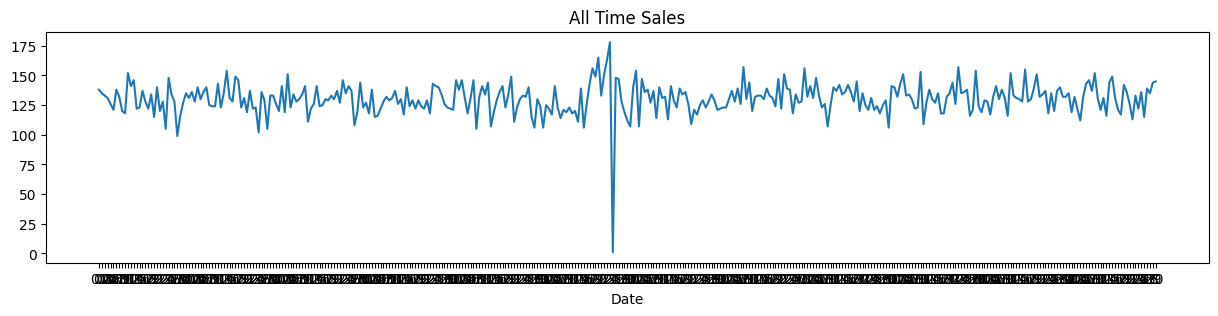

In [37]:
trans_by_date = merge_value['Date'].value_counts()
all_time = trans_by_date[(trans_by_date.index >= pd.Timestamp('2018-7-1')) & (trans_by_date.index <= pd.Timestamp('2019-6-30'))].sort_index()
all_time.index = all_time.index.strftime('%d')
ax = all_time.plot(figsize=(15, 3))
ax.set_xticks(np.arange(len(all_time)))
ax.set_xticklabels(all_time.index)
plt.title('All Time Sales')
plt.savefig('all_time.png', bbox_inches='tight')
plt.show()

**December Sales Graph**

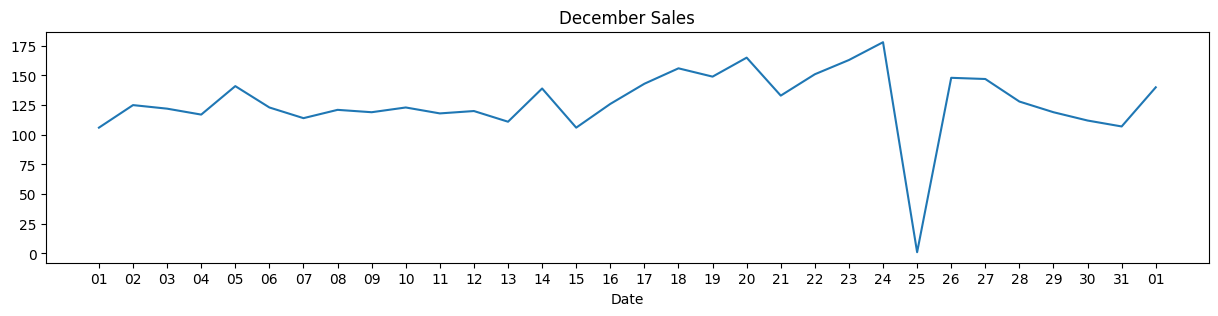

In [38]:
trans_by_date = merge_value['Date'].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.Timestamp('2018-12-1')) & (trans_by_date.index <= pd.Timestamp('2019-1-1'))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15, 3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title('December Sales')
plt.savefig('December Sales.png', bbox_inches='tight')
plt.show()

**Explore Product Pack Size**

In [39]:
# Ensure no spaces between the number and 'g'/'G' in the regex
df['Product'] = df['Product'].str.replace(r'(\d+)\s*[gG]', r'\1g', regex =True)
# Extract the numeric part before 'g' or 'G' and covert to float
pack_size = df['Product'].str.extract(r'(\d+)[gG]')[0].astype(float)
print(pack_size)

0        175.0
1        175.0
2        170.0
3        175.0
4        150.0
         ...  
51017    165.0
51018    175.0
51019    170.0
51020    150.0
51021    150.0
Name: 0, Length: 47529, dtype: float64


**Summary Of Pack Size**

In [40]:
pack_size.describe()

,0
count,47529.000000
mean,175.756759
std,59.437023
min,70.000000
25%,150.000000
50%,170.000000
75%,175.000000
max,380.000000


**Histrogram Showing Transaction Frequency of Pack Size**

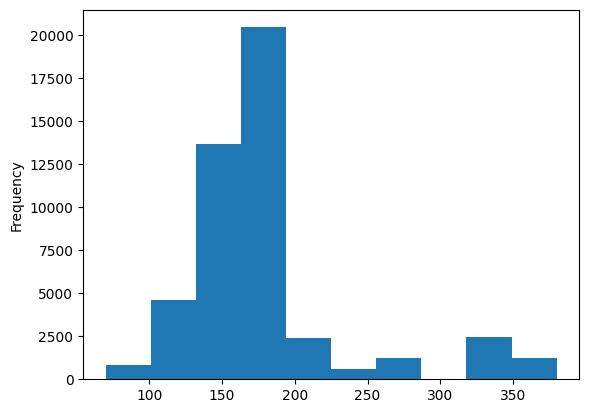

In [41]:
pack_size.plot.hist()
plt.show()

**Frequency Of Product Brand Names**

In [43]:
df['Product'].str.split().str[0].value_counts()

,count
Product,
Kettle,7925
Smiths,5352
Pringles,4712
Doritos,4203
Thins,2638
RRD,2337
Infuzions,2118
WW,2025
Cobs,1858


**Include Brand Name Column**

In [44]:
df['Brand'] = df['Product'].str.split().str[0]
df.head()

,Date,Store Id,Customer Number,Transaction Id,Product Number,Product,Quantity,Sales,Group,Subscription,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle


**Combine Brand Names**

In [45]:
def clear_brand_names(line) :
  brand = line['Brand']
  if brand == 'Dorito':
    return 'Doritos'
  elif brand == 'GrnWves' or brand == 'Grain' :
    return 'Grain Waves'
  elif brand == 'Infzns':
    return 'Infuzions'
  elif brand == 'Natural' or brand == 'NCC' :
    return 'Natrual Chip Co'
  elif brand == 'Red':
    return 'RRD'
  elif brand == 'Smith':
    return 'Smiths'
  elif brand == 'Snbts':
    return 'Sunbites'
  elif brand == 'WW' :
    return 'Woolworths'
  else:
    return brand

**Cleand Transactional Data**

In [46]:
df['Brand'] = df.apply(lambda line : clear_brand_names(line), axis=1)
df.head()

,Date,Store Id,Customer Number,Transaction Id,Product Number,Product,Quantity,Sales,Group,Subscription,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natrual Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle


**Histogram Of Brand Frequency**

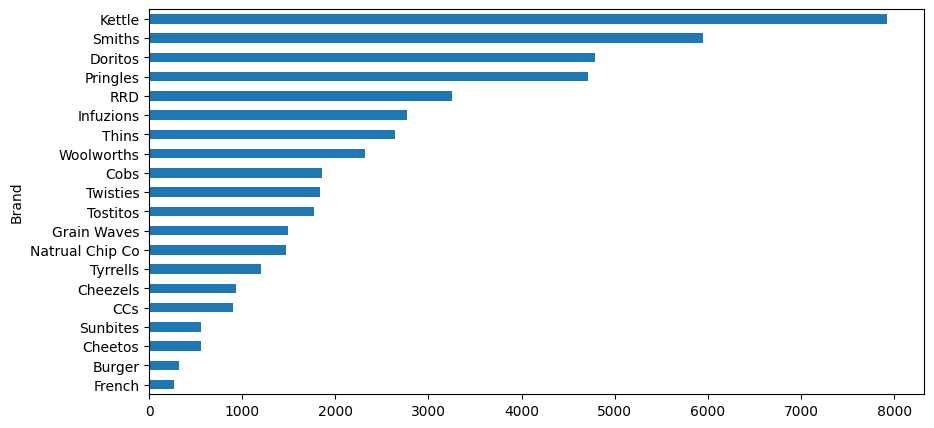

In [47]:
df['Brand'].value_counts(ascending = True).plot.barh(figsize = (10,5))
plt.show()

**Data Analysis**

In [48]:
# Step 01: Who spends the most on chips (total sales), by lifestage and premium level?

most_shopping = df.groupby(['Group', 'Subscription'])['Sales'].agg(['sum']).sort_values(by='sum', ascending=False)
most_shopping

sum
Group                  Subscription           
OLDER FAMILIES         Budget        128084.55
MIDAGE SINGLES/COUPLES Mainstream     84734.25
                       Premium        54443.85
                       Budget         33345.70
NEW FAMILIES           Budget         20607.45
                       Mainstream     15979.70
                       Premium        10760.80
YOUNG SINGLES/COUPLES  Premium            6.00

**Histrogram of Customer Segment Contribute to Chips Sales**

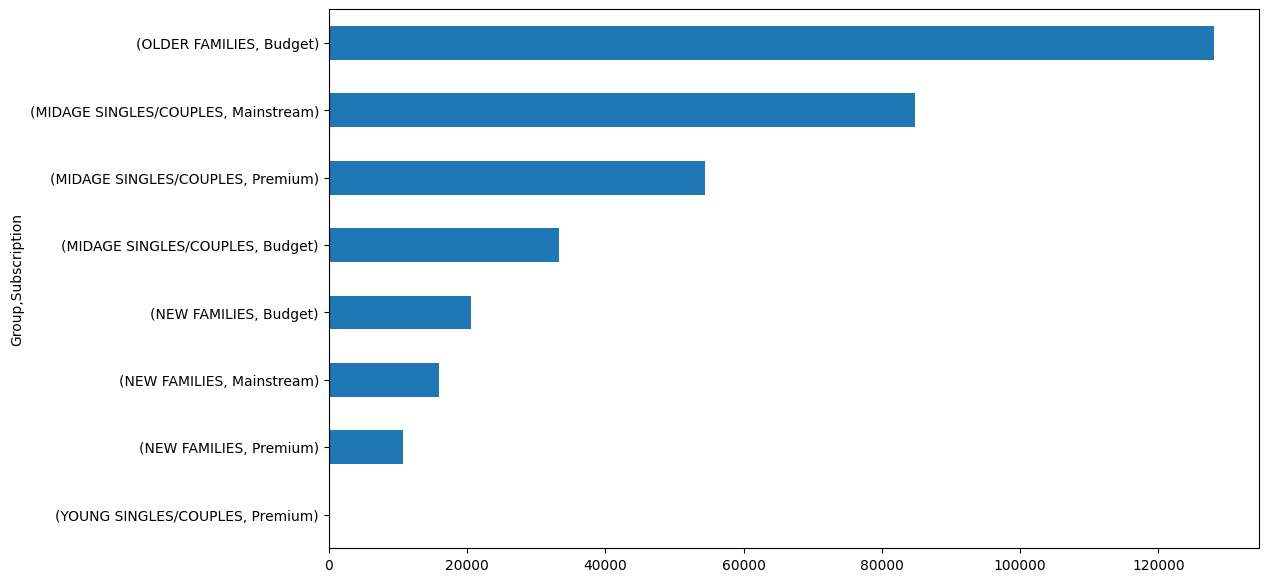

In [50]:
most_shopping['sum'].sort_values().plot.barh(figsize = (12,7))
plt.show()

**most_shopping(GRAPH):** Top 3 segments by total chip sales contribution:

*   Older Families (Budget) — $156,863.75

*   Young Singles/Couples (Mainstream) — $147,582.20

*   Retirees (Mainstream) — $145,168.95





**Top Shopping Per Group By Subscription**

In [52]:
stage_agg_prem = df.groupby('Group')['Subscription'].agg(pd.Series.mode).sort_values()
print('Top Contributor per Droup By Subscription:\n' )
print(stage_agg_prem)

Top Contributor per Droup By Subscription:

Group
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
YOUNG SINGLES/COUPLES        Premium
Name: Subscription, dtype: object


In [53]:
# Step 02: How many customers are in each segment?

cust_seg = df.groupby(['Group', 'Subscription'])['Customer Number'].nunique().sort_values(ascending=False)
pd.DataFrame(cust_seg)

Customer Number
Group                  Subscription                 
OLDER FAMILIES         Budget                   3820
MIDAGE SINGLES/COUPLES Mainstream               3298
                       Premium                  2369
                       Budget                   1474
NEW FAMILIES           Budget                   1087
                       Mainstream                830
                       Premium                   575
YOUNG SINGLES/COUPLES  Premium                     1

**Histogram of Customer Segments Frequency**

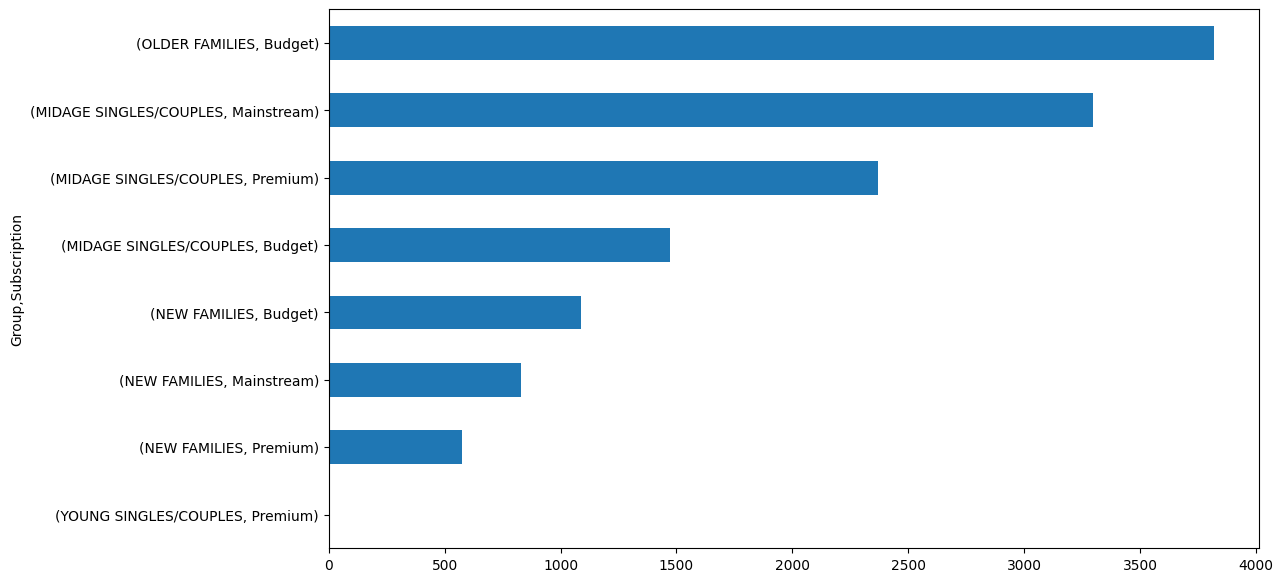

In [54]:
cust_seg.sort_values().plot.barh(figsize = (12,7))
plt.show()

**cust_seg(GRAPH)**: Young Singles/Couples(Mainstream) has the highest population, followed by Retirees(Mainstream). which explain their total sales

In [55]:
# Step 03: How many chips are bought per customer by segment?
# indiviual customer chips shopping by date

chips_shop_per_segment = df.groupby(['Customer Number', 'Group', 'Subscription']).count()['Date']
chips_shop_per_segment.to_frame()

,,,Date
Customer Number,Group,Subscription,
1000,YOUNG SINGLES/COUPLES,Premium,1
1005,MIDAGE SINGLES/COUPLES,Mainstream,1
1009,NEW FAMILIES,Premium,1
1022,OLDER FAMILIES,Budget,1
1023,MIDAGE SINGLES/COUPLES,Premium,1
...,...,...,...
880711,OLDER FAMILIES,Budget,2
2330031,MIDAGE SINGLES/COUPLES,Premium,2
2330211,MIDAGE SINGLES/COUPLES,Budget,1


In [56]:
# Chips shopping from group by individual(Avg)
segment_shop_chips = chips_shop_per_segment.groupby(['Group', 'Subscription']).agg(['mean']).sort_values(by=('mean'), ascending=False)
segment_shop_chips

mean
Group                  Subscription          
OLDER FAMILIES         Budget        4.615969
MIDAGE SINGLES/COUPLES Mainstream    3.364160
                       Premium       3.213170
                       Budget        3.182497
NEW FAMILIES           Mainstream    2.632530
                       Budget        2.597976
                       Premium       2.587826
YOUNG SINGLES/COUPLES  Premium       1.000000

**Histogram of Chips Shopping By Segment**

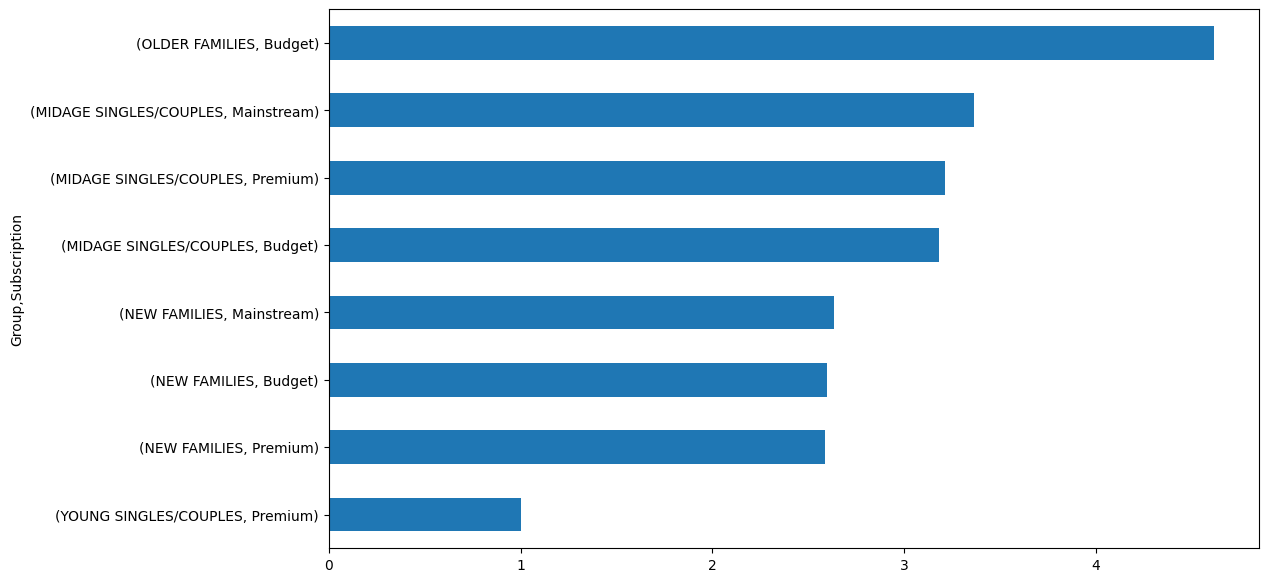

In [57]:
segment_shop_chips['mean'].sort_values().plot.barh(figsize = (12,7))
plt.show()

**segment_shop_chips(GRAPH)** despite older familier not having the highest population. they have the highest frequency of purchase, which contribute to the total high total sales. older familes follwed by young families has the highest average quantity of chips bought per purchase

In [59]:
# Step 04: What is the average chip price by customer segment?

avg_chip_price_cust_segment = df.groupby(['Group', 'Subscription'])['Sales'].agg(['mean']).sort_values(by='mean', ascending=False)
avg_chip_price_cust_segment

mean
Group                  Subscription          
MIDAGE SINGLES/COUPLES Mainstream    7.637156
NEW FAMILIES           Mainstream    7.313364
                       Budget        7.297256
OLDER FAMILIES         Budget        7.264323
NEW FAMILIES           Premium       7.231720
MIDAGE SINGLES/COUPLES Premium       7.152371
                       Budget        7.108442
YOUNG SINGLES/COUPLES  Premium       6.000000

**Histrogram Of Average Chips Price By Customer Segment**

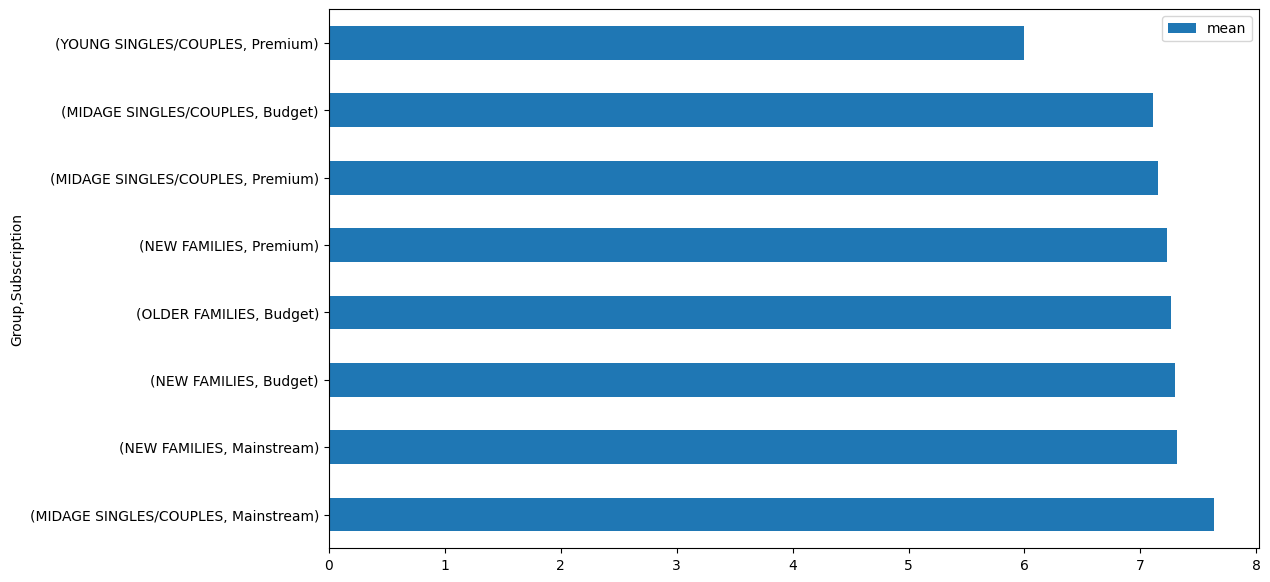

In [60]:
avg_chip_price_cust_segment.plot.barh(figsize = (12, 7))
plt.show()

**avg_chip_price_cust_segment(GRAPH):** the Mainstram Category of the 'Young & Midage single/couple' have the highest spending of ships per purchase. And the difference to the non-Mainstream 'Young &Midage Single/Couples' are statiscally significant.

**T-Test**

In [66]:
# The gap between mainstream and non-mainstream (7.6 vs 6.6) seems small, but we’ll test if it’s statistically significant.

import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# Define groups correctly
mainstream = df['Subscription'] == 'Mainstream'
budget_premium = df['Subscription'].isin(['Budget', 'Premium'])
young_midage = df['Group'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])

# Samples
a = df[young_midage & mainstream]['Sales']
b = df[young_midage & budget_premium]['Sales']

# Test
if len(a) > 1 and len(b) > 1:
    stat, pval = ttest_ind(a, b, equal_var=False)
    print("t-test p-value:", pval)
else:
    stat, pval = mannwhitneyu(a, b, alternative='two-sided')
    print("Mann-Whitney U p-value:", pval)

print("Statistically significant?" , pval < 0.0000001)


t-test p-value: 3.455229860871379e-54
Statistically significant? True


**Examine What Brand Of Chips The Top 3 Segments Contributing To Total Sales are Buying**

In [67]:
df.groupby(['Group', 'Subscription'])['Brand'].agg(pd.Series.mode).sort_values().to_frame()

Brand
Group                  Subscription                 
MIDAGE SINGLES/COUPLES Budget                 Kettle
                       Mainstream             Kettle
                       Premium                Kettle
NEW FAMILIES           Budget                 Kettle
                       Mainstream             Kettle
                       Premium                Kettle
OLDER FAMILIES         Budget                 Kettle
YOUNG SINGLES/COUPLES  Premium       Natrual Chip Co

**Chips Brand 'Kettle' is Dominating  Every Segment  As The Most Purchasing Brand**

========== YOUNG SINGLES/COUPLES - Premium ==========
Brand
Natrual Chip Co    1
Name: count, dtype: int64


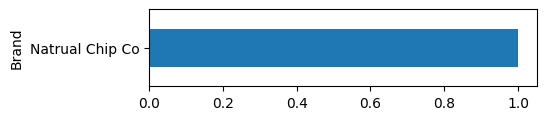

========== YOUNG SINGLES/COUPLES - Budget ==========
========== YOUNG SINGLES/COUPLES - Mainstream ==========
========== MIDAGE SINGLES/COUPLES - Premium ==========
Brand
Kettle      1206
Smiths       923
Pringles     781
Name: count, dtype: int64


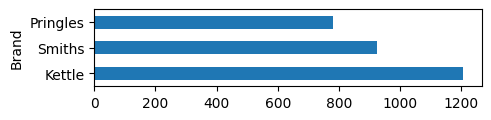

========== MIDAGE SINGLES/COUPLES - Budget ==========
Brand
Kettle     713
Smiths     591
Doritos    479
Name: count, dtype: int64


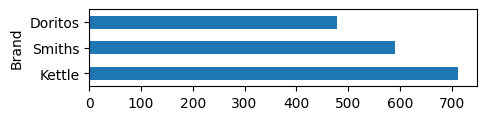

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Brand
Kettle     2136
Smiths     1276
Doritos    1210
Name: count, dtype: int64


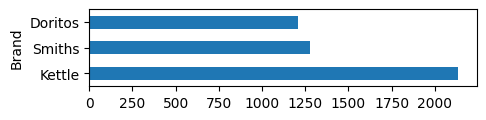

========== NEW FAMILIES - Premium ==========
Brand
Kettle      247
Pringles    165
Smiths      155
Name: count, dtype: int64


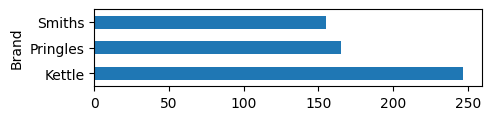

========== NEW FAMILIES - Budget ==========
Brand
Kettle     510
Smiths     328
Doritos    315
Name: count, dtype: int64


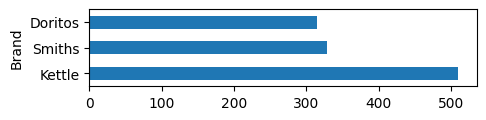

========== NEW FAMILIES - Mainstream ==========
Brand
Kettle     414
Doritos    257
Smiths     244
Name: count, dtype: int64


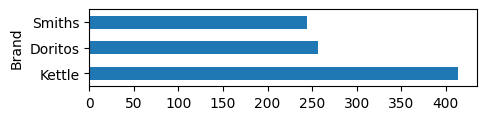

========== OLDER FAMILIES - Premium ==========
========== OLDER FAMILIES - Budget ==========
Brand
Kettle     2699
Smiths     2429
Doritos    1641
Name: count, dtype: int64


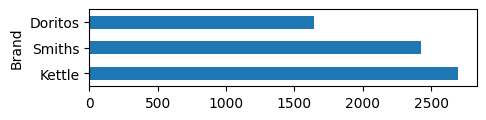

========== OLDER FAMILIES - Mainstream ==========


In [73]:
for stage in df['Group'].unique() :
  for subs in df['Subscription'].unique() :
      print('==========', stage, '-', subs, '==========')
      summary = df[(df['Group'] == stage) & (df['Subscription'] == subs)]['Brand'].value_counts().head(3)
      if not summary.empty:
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5, 1))
        plt.show()

**Brand(GRAPH):** Every segment had 'Kettle' as the most purchased brand. every segment except 'Young Singles/Couples Mainstream' had 'Smiths as their second most purchased brand. 'Young Singles/Couples Mainstream had Doritos as as their second most purchased brand

**Examine If Our Target Segment Tends To Buy Larger Packs of Chips**

In [74]:
# merge DF with pack size
merged_pack = pd.concat([df, pack_size.rename('Size')], axis = 1)
merged_pack.head()

,Date,Store Id,Customer Number,Transaction Id,Product Number,Product,Quantity,Sales,Group,Subscription,Brand,Size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natrual Chip Co,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150.0


========== YOUNG SINGLES/COUPLES - Premium ==========
Size
175.0    1
Name: count, dtype: int64


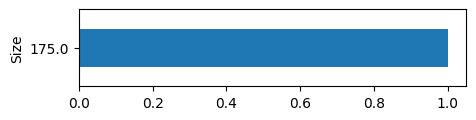

========== YOUNG SINGLES/COUPLES - Budget ==========
========== YOUNG SINGLES/COUPLES - Mainstream ==========
========== MIDAGE SINGLES/COUPLES - Premium ==========
Size
134.0     781
150.0    1207
175.0    2082
Name: count, dtype: int64


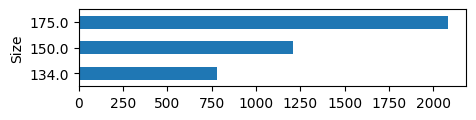

========== MIDAGE SINGLES/COUPLES - Budget ==========
Size
134.0     449
150.0     771
175.0    1277
Name: count, dtype: int64


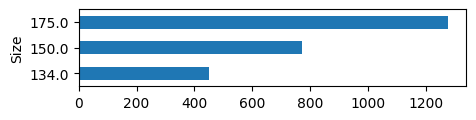

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Size
134.0    1159
150.0    1777
175.0    2975
Name: count, dtype: int64


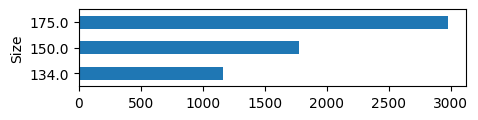

========== NEW FAMILIES - Premium ==========
Size
134.0    165
150.0    233
175.0    376
Name: count, dtype: int64


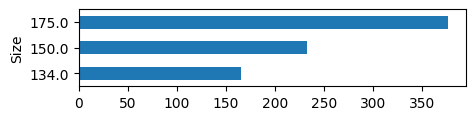

========== NEW FAMILIES - Budget ==========
Size
134.0    309
150.0    440
175.0    777
Name: count, dtype: int64


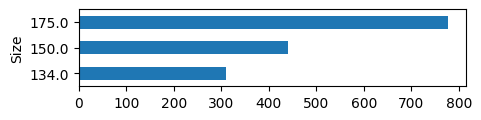

========== NEW FAMILIES - Mainstream ==========
Size
134.0    224
150.0    374
175.0    589
Name: count, dtype: int64


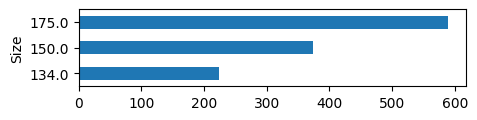

========== OLDER FAMILIES - Premium ==========
========== OLDER FAMILIES - Budget ==========
Size
134.0    1625
150.0    2930
175.0    4747
Name: count, dtype: int64


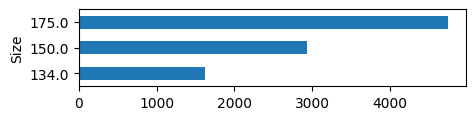

========== OLDER FAMILIES - Mainstream ==========


In [75]:
for stage in merged_pack['Group'].unique() :
  for subs in merged_pack['Subscription'].unique() :
      print('==========', stage, '-', subs, '==========')
      summary = merged_pack[(merged_pack['Group'] == stage) & (merged_pack['Subscription'] == subs)]['Size'].value_counts().head(3).sort_index()
      if not summary.empty:
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5, 1))
        plt.show()

**Size(GRAPH):**  Most frequent chips size purchased is 175g Followed by 150g chips size for all segments

**Average Amount Of Chips Bought Per Customer Segment**

In [77]:
avg_chips = (df.groupby(['Group', 'Subscription'])['Quantity'].sum() / df.groupby(['Group', 'Subscription'])['Customer Number'].nunique()).sort_values(ascending = False).to_frame()
avg_chips

0
Group                  Subscription          
OLDER FAMILIES         Budget        8.969634
MIDAGE SINGLES/COUPLES Mainstream    6.432080
                       Premium       6.078514
                       Budget        6.026459
NEW FAMILIES           Mainstream    4.891566
                       Budget        4.821527
                       Premium       4.815652
YOUNG SINGLES/COUPLES  Premium       2.000000

**Histogram Of Average Amount Of Chips Bought Per Customer Segment**

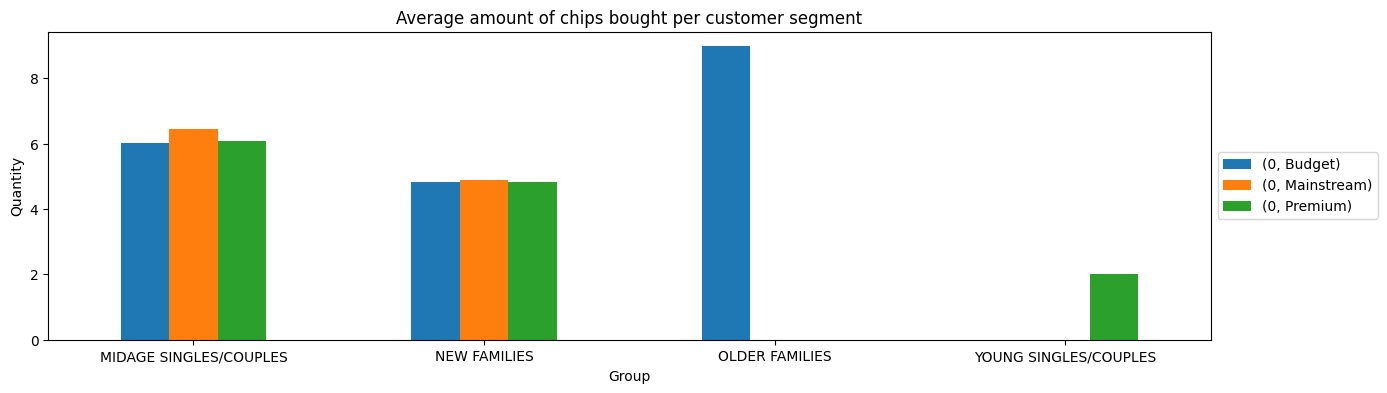

In [80]:
avg_chips.unstack().plot.bar(figsize = (15,4), rot =0)
plt.title('Average amount of chips bought per customer segment')
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.ylabel('Quantity')
plt.show()

**Average Chips Price Per Transaction By Segments**

In [81]:
# calculate 'Unit Price' only where 'Quantity' is non-zero and both columns are not null
df['Unit Price'] = df['Sales'] / df['Quantity'].replace(0, pd.NA)
# Group  by 'Group' and 'Subscription' and calculate the mean of 'Unit Price'
chips_segment = df.groupby(['Group', 'Subscription'], dropna = False)['Unit Price'].mean().sort_values(ascending = False).to_frame()
# Displaythe resulting DataFrame
chips_segment

Unit Price
Group                  Subscription            
MIDAGE SINGLES/COUPLES Mainstream      3.994241
NEW FAMILIES           Budget          3.917688
                       Mainstream      3.916133
                       Premium         3.872110
MIDAGE SINGLES/COUPLES Premium         3.770698
                       Budget          3.743328
OLDER FAMILIES         Budget          3.736629
YOUNG SINGLES/COUPLES  Premium         3.000000

**Histogram Of Average Chips Price Per Transaction By Segments**

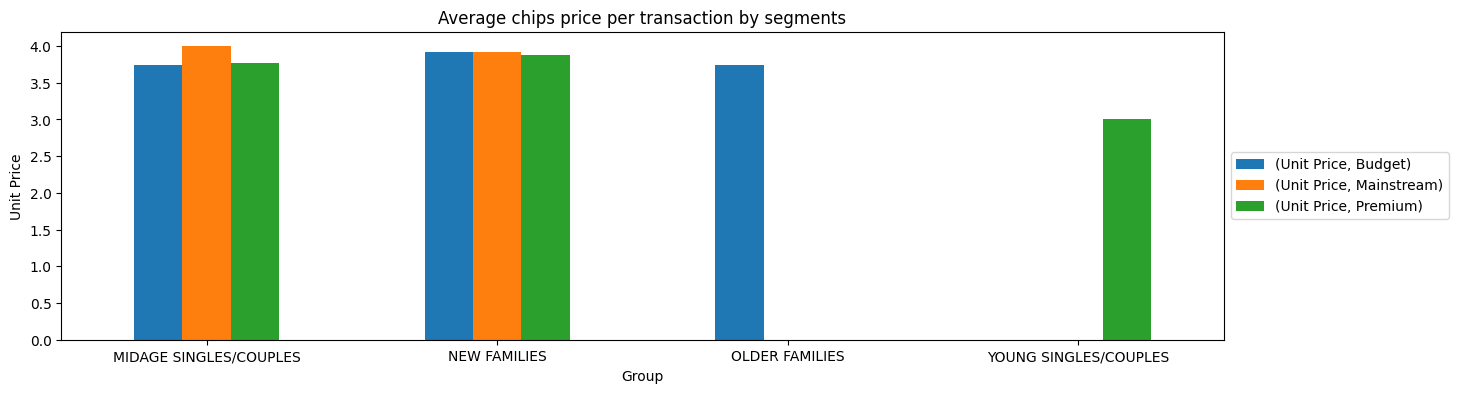

In [82]:
chips_segment.unstack().plot.bar(figsize = (15,4), rot =0)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.title('Average chips price per transaction by segments')
plt.ylabel('Unit Price')
plt.show()

**RECOMMENDATIONS**

**1) - OLDER FAMILIES:** For Older Families in the Budget segment, the data shows that they purchase chips frequently and in larger quantities during each visit. Since they are heavy buyers with a value-driven mindset, promotions that encourage both frequency and bulk purchasing would be most effective. Offering bundle deals, multi-buy promotions, or larger pack discounts can help maximize their spending while reinforcing chips as a go-to family snack option.

**2) - YOUNG SINGLES/COUPLES:** Among Young Singles and Couples in the Mainstream segment, the analysis revealed a unique purchasing behavior: this is the only group that ranked Doritos as their second most purchased brand after Kettle. Given their large population size and potential influence, this group is worth targeting with brand-specific campaigns. Collaborations with Doritos, supported by digital and social media promotions, can capture their attention effectively. Smaller impulse packs positioned at checkout counters or promoted through delivery apps can also strengthen their engagement, since convenience and visibility play a big role for this demographic

**3) - RETIREES:** For Retirees in the Mainstream segment, their contribution to overall chip sales comes primarily from their population size and consistent buying habits. They are loyal, steady customers, and strategies should therefore focus on making their preferred brands and pack sizes highly available. Promotions aimed at this group should emphasize value and familiarity, using channels they are most responsive to, such as in-store promotions, catalog deals, or traditional media rather than digital campaigns. Multi-buy offers that allow them to stock up for home consumption would also suit their buying style.

**4) - GENERAL:** Finally, there are some general strategies that apply across all segments. The clear preference for Kettle as the top brand, and the dominance of 175g packs followed by 150g, suggest that these should be the focus of broad-based promotions. Positioning Kettle’s 175g packs at eye level in-store, featuring them in advertising campaigns, and bundling them with complementary products like dips or soft drinks can help increase both visibility and basket size. Maintaining competitive pricing for Kettle ensures its continued dominance, while still leaving room to experiment with smaller brands in niche or segment-specific promotions.

Overall, the strategy should combine broad category plays with precise, segment-focused campaigns. Families should be encouraged to buy more frequently and in bulk, young couples should be engaged through brand partnerships and digital promotions, and retirees should be supported with accessible, value-focused offers. At the same time, Kettle and 175g packs should remain the central focus of mass marketing efforts across all customer groups.